In [1]:
## Note: the .wav files can be access via this link: https://drive.google.com/open?id=0B2VWgIA6KAZ4dkJNTlhmNHhRSVU

import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from scipy.io import wavfile

%matplotlib inline


In [2]:
Germany = wavfile.read("anthem1.wav")
Austria = wavfile.read("anthem2.wav")
Russia = wavfile.read("anthem3.wav")

# set the length of the array to the shortest audio file.
audioLen = 3065789 

#Get data of anthem
Germany = Germany[1]
Austria = Austria[1]
Russia = Russia[1]

#specify the extracted length
Germany = Germany[0:audioLen]
Austria = Austria[0:audioLen]
Russia = Russia[0:audioLen]


#Generate a Transpose Matrix for easy extraction of the left channel
Germany = Germany.T
Austria = Austria.T
Russia = Russia.T

#extract left channel
Germany = Germany[0]
Austria = Austria[0]
Russia = Russia[0]

S = np.c_[Germany, Austria, Russia]


In [3]:
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

scalledX = X / X.std(axis=0)
wavfile.write("mixed_signals1.wav", 44100, scalledX.T[0])
wavfile.write("mixed_signals2.wav", 44100, scalledX.T[1])
wavfile.write("mixed_signals3.wav", 44100, scalledX.T[2])


In [4]:
# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
scalledS_= S_ / S_.std(axis=0)
wavfile.write("demixed1_ICA.wav", 44100, scalledS_.T[0])
wavfile.write("demixed2_ICA.wav", 44100, scalledS_.T[1])
wavfile.write("demixed3_ICA.wav", 44100, scalledS_.T[2])

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [5]:
# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components
scalledH = H / H.std(axis=0)
wavfile.write("demixed1_PCA.wav", 44100, scalledH.T[0])
wavfile.write("demixed2_PCA.wav", 44100, scalledH.T[1])
wavfile.write("demixed3_PCA.wav", 44100, scalledH.T[2])

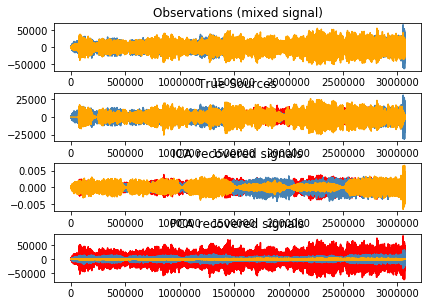

In [6]:
# Visual comparison between PCA and ICA when applied to the audio files (overview)

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

What happens if you try to extract less signals than sources? 

This will not produce the best results. Because in ICA, the number of signals has to equal the number of sources, which is one of the main challanges of this method. In this exercise, I knew already that I have 3 sources, which made it easy to specify the number of independent components, which also has to be 3, in order for this method to work well. 

Also try to determine the original signals by applying PCA. Which one works better?

The fiqure above shows the different signals extracted by ICA and PCA. ICA extractd signals that are much closer to the True sources than the signals extracted by PCA. Also the .wav files generated by ICA method when different channels are specified shows clear signals from each source. However, this is not the case for PCA, as every channel specified generated similar outputs for all. Which proves that ICA is a much better method for a blind source separation case. 

Source: Scikitlearn documentation of Blind source separation using FastICA

